<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practised them yet). In this project we'll review _train/test split_ validation that is a fundamental method for avoiding overfitting. 

The idea is similar to 'cross-validation' — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

We will cover Linear Regression and Knn in this project, with an Enrichment section at the end:
<a id="home"></a>
1. [Linear Regression - Ames housing data](#lin-reg)
2. [Optional: Knn - iris data set](#knn)
3. [Optional: Enrichment](#enrichment)

#### [Home](#home)

<a id="lin-reg"></a>
# <font style='color: green'>1) Linear Regression Use Case</font>

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Ames housing data by picking three different subsets of variables. (You could also fit one or more polynomial models, or any other model you'd like, but we haven't covered them.) 

### Here's What We Will Be Doing:

* Working with Ames housing data to predict the value of a home.
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

In this given task, you will be asked to model the median home price of various houses in Iowa (the Ames housing data set we have come across before). This is a probable use case: we are predicting a continuous, numeric output (price) based on a combination of discrete features.

Reminder of the dataset: [Ames house price data on Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

### Data dictionary (taken from Kaggle)

+ SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
+ MSSubClass: The building class
+ MSZoning: The general zoning classification
+ LotFrontage: Linear feet of street connected to property
+ LotArea: Lot size in square feet
+ Street: Type of road access
+ Alley: Type of alley access
+ LotShape: General shape of property
+ LandContour: Flatness of the property
+ Utilities: Type of utilities available
+ LotConfig: Lot configuration
+ LandSlope: Slope of property
+ Neighborhood: Physical locations within Ames city limits
+ Condition1: Proximity to main road or railroad
+ Condition2: Proximity to main road or railroad (if a second is present)
+ BldgType: Type of dwelling
+ HouseStyle: Style of dwelling
+ OverallQual: Overall material and finish quality
+ OverallCond: Overall condition rating
+ YearBuilt: Original construction date
+ YearRemodAdd: Remodel date
+ RoofStyle: Type of roof
+ RoofMatl: Roof material
+ Exterior1st: Exterior covering on house
+ Exterior2nd: Exterior covering on house (if more than one material)
+ MasVnrType: Masonry veneer type
+ MasVnrArea: Masonry veneer area in square feet
+ ExterQual: Exterior material quality
+ ExterCond: Present condition of the material on the exterior
+ Foundation: Type of foundation
+ BsmtQual: Height of the basement
+ BsmtCond: General condition of the basement
+ BsmtExposure: Walkout or garden level basement walls
+ BsmtFinType1: Quality of basement finished area
+ BsmtFinSF1: Type 1 finished square feet
+ BsmtFinType2: Quality of second finished area (if present)
+ BsmtFinSF2: Type 2 finished square feet
+ BsmtUnfSF: Unfinished square feet of basement area
+ TotalBsmtSF: Total square feet of basement area
+ Heating: Type of heating
+ HeatingQC: Heating quality and condition
+ CentralAir: Central air conditioning
+ Electrical: Electrical system
+ 1stFlrSF: First Floor square feet
+ 2ndFlrSF: Second floor square feet
+ LowQualFinSF: Low quality finished square feet (all floors)
+ GrLivArea: Above grade (ground) living area square feet
+ BsmtFullBath: Basement full bathrooms
+ BsmtHalfBath: Basement half bathrooms
+ FullBath: Full bathrooms above grade
+ HalfBath: Half baths above grade
+ Bedroom: Number of bedrooms above basement level
+ Kitchen: Number of kitchens
+ KitchenQual: Kitchen quality
+ TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
+ Functional: Home functionality rating
+ Fireplaces: Number of fireplaces
+ FireplaceQu: Fireplace quality
+ GarageType: Garage location
+ GarageYrBlt: Year garage was built
+ GarageFinish: Interior finish of the garage
+ GarageCars: Size of garage in car capacity
+ GarageArea: Size of garage in square feet
+ GarageQual: Garage quality
+ GarageCond: Garage condition
+ PavedDrive: Paved driveway
+ WoodDeckSF: Wood deck area in square feet
+ OpenPorchSF: Open porch area in square feet
+ EnclosedPorch: Enclosed porch area in square feet
+ 3SsnPorch: Three season porch area in square feet
+ ScreenPorch: Screen porch area in square feet
+ PoolArea: Pool area in square feet
+ PoolQC: Pool quality
+ Fence: Fence quality
+ MiscFeature: Miscellaneous feature not covered in other categories
+ MiscVal: $Value of miscellaneous feature
+ MoSold: Month Sold
+ YrSold: Year Sold
+ SaleType: Type of sale
+ SaleCondition: Condition of sale

In [154]:
# Import the libraries 

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
#import data and set up our feature matrix (Xs) and response vector (y)

houses = pd.read_csv('data/iowa_houses.csv')

# create feature matrix (X)
feature_cols = houses.columns.drop(['SalePrice'])
X = houses[feature_cols]

# create response vector (y)
y = houses.SalePrice

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [ ]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column

# Remember to handle null cells and columns with non-numeric data in them. Document the decisions you have made and
# why you have made them.


In [38]:
houses.head(10)

,Neighborhood,LotArea,MSZoning,HouseStyle,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
0,CollgCr,8450,RL,2Story,65.0,7,5,2003,2003,856,...,1,8,0,2003.0,2,548,0,61,0,208500
1,Veenker,9600,RL,1Story,80.0,6,8,1976,1976,1262,...,1,6,1,1976.0,2,460,298,0,0,181500
2,CollgCr,11250,RL,2Story,68.0,7,5,2001,2002,920,...,1,6,1,2001.0,2,608,0,42,0,223500
3,Crawfor,9550,RL,2Story,60.0,7,5,1915,1970,756,...,1,7,1,1998.0,3,642,0,35,272,140000
4,NoRidge,14260,RL,2Story,84.0,8,5,2000,2000,1145,...,1,9,1,2000.0,3,836,192,84,0,250000
5,Mitchel,14115,RL,1.5Fin,85.0,5,5,1993,1995,796,...,1,5,0,1993.0,2,480,40,30,0,143000
6,Somerst,10084,RL,1Story,75.0,8,5,2004,2005,1686,...,1,7,1,2004.0,2,636,255,57,0,307000
7,NWAmes,10382,RL,2Story,NaN,7,6,1973,1973,1107,...,1,7,2,1973.0,2,484,235,204,228,200000
8,OldTown,6120,RM,1.5Fin,51.0,7,5,1931,1950,952,...,2,8,2,1931.0,2,468,90,0,205,129900
9,BrkSide,7420,RL,1.5Unf,50.0,5,6,1939,1950,991,...,2,5,2,1939.0,1,205,0,4,0,118000


In [52]:
#nulls
#LotFrontage (259) and GarageYrBlt (81) have nulls. 
#I believe these can be safely ignored since they are not likely to contribue greatly to SalePrice
houses.isnull().sum()

Neighborhood       0
LotArea            0
MSZoning           0
HouseStyle         0
LotFrontage      259
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
SalePrice          0
dtype: int64

In [56]:
# data types
#Neighborhood, MSZoning and HouseStyle are non-numeric
houses.dtypes

Neighborhood      object
LotArea            int64
MSZoning          object
HouseStyle        object
LotFrontage      float64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
SalePrice          int64
dtype: object

In [54]:
#shape
houses.shape

(1460, 27)

In [53]:
#summary stats
houses.describe()

,LotArea,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,70.049958,6.099315,5.575342,1971.267808,1984.865753,1057.429452,1162.626712,346.992466,5.844521,...,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,180921.195890
std,9981.264932,24.284752,1.382997,1.112799,30.202904,20.645407,438.705324,386.587738,436.528436,48.623081,...,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,79442.502883
min,1300.000000,21.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,59.000000,5.000000,5.000000,1954.000000,1967.000000,795.750000,882.000000,0.000000,0.000000,...,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,129975.000000
50%,9478.500000,69.000000,6.000000,5.000000,1973.000000,1994.000000,991.500000,1087.000000,0.000000,0.000000,...,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,163000.000000
75%,11601.500000,80.000000,7.000000,6.000000,2000.000000,2004.000000,1298.250000,1391.250000,728.000000,0.000000,...,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,214000.000000
max,215245.000000,313.000000,10.000000,9.000000,2010.000000,2010.000000,6110.000000,4692.000000,2065.000000,572.000000,...,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,755000.000000


In [55]:
#values for each column
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Neighborhood   1460 non-null   object 
 1   LotArea        1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   HouseStyle     1460 non-null   object 
 4   LotFrontage    1201 non-null   float64
 5   OverallQual    1460 non-null   int64  
 6   OverallCond    1460 non-null   int64  
 7   YearBuilt      1460 non-null   int64  
 8   YearRemodAdd   1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  1stFlrSF       1460 non-null   int64  
 11  2ndFlrSF       1460 non-null   int64  
 12  LowQualFinSF   1460 non-null   int64  
 13  GrLivArea      1460 non-null   int64  
 14  FullBath       1460 non-null   int64  
 15  HalfBath       1460 non-null   int64  
 16  BedroomAbvGr   1460 non-null   int64  
 17  KitchenAbvGr   1460 non-null   int64  
 18  TotRmsAb

## Additional EDA

In [72]:
#correlation matrix
houses.corr()

,LotArea,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
LotArea,1.000000,0.426095,0.105806,-0.005636,0.014228,0.013788,0.260833,0.299475,0.050986,0.004779,...,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.263843
LotFrontage,0.426095,1.000000,0.251646,-0.059213,0.123349,0.088866,0.392075,0.457181,0.080177,0.038469,...,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.351799
OverallQual,0.105806,0.251646,1.000000,-0.091932,0.572323,0.550684,0.537808,0.476224,0.295493,-0.030429,...,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.790982
OverallCond,-0.005636,-0.059213,-0.091932,1.000000,-0.375983,0.073741,-0.171098,-0.144203,0.028942,0.025494,...,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,-0.077856
YearBuilt,0.014228,0.123349,0.572323,-0.375983,1.000000,0.592855,0.391452,0.281986,0.010308,-0.183784,...,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.522897
YearRemodAdd,0.013788,0.088866,0.550684,0.073741,0.592855,1.000000,0.291066,0.240379,0.140024,-0.062419,...,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.507101
TotalBsmtSF,0.260833,0.392075,0.537808,-0.171098,0.391452,0.291066,1.000000,0.819530,-0.174512,-0.033245,...,-0.068901,0.285573,0.339519,0.322445,0.434585,0.486665,0.232019,0.247264,-0.095478,0.613581
1stFlrSF,0.299475,0.457181,0.476224,-0.144203,0.281986,0.240379,0.819530,1.000000,-0.202646,-0.014241,...,0.068101,0.409516,0.410531,0.233449,0.439317,0.489782,0.235459,0.211671,-0.065292,0.605852
2ndFlrSF,0.050986,0.080177,0.295493,0.028942,0.010308,0.140024,-0.174512,-0.202646,1.000000,0.063353,...,0.059306,0.616423,0.194561,0.070832,0.183926,0.138347,0.092165,0.208026,0.061989,0.319334
LowQualFinSF,0.004779,0.038469,-0.030429,0.025494,-0.183784,-0.062419,-0.033245,-0.014241,0.063353,1.000000,...,0.007522,0.131185,-0.021272,-0.036363,-0.094480,-0.067601,-0.025444,0.018251,0.061081,-0.025606


<AxesSubplot:>

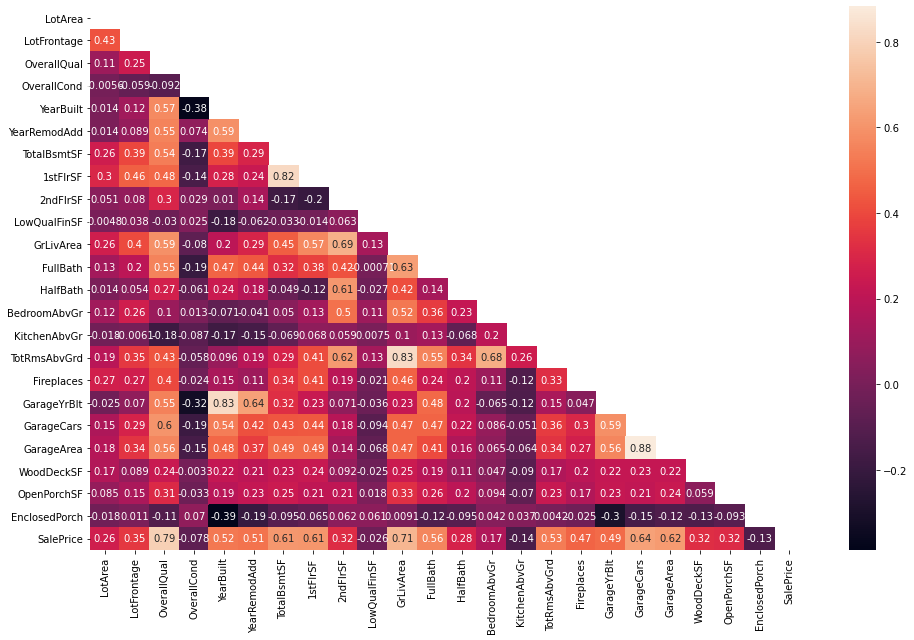

In [71]:
#correlation heat map
mask = np.zeros_like(houses.corr())
indicies = np.triu_indices_from(mask)
mask[indicies] = True
plt.figure(figsize=(16,10))
sns.heatmap(houses.corr(), mask=mask, annot=True)

In [82]:
#SalePrice correlation
houses.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
Fireplaces       0.466929
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BedroomAbvGr     0.168213
LowQualFinSF    -0.025606
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [100]:
#looking at the house SalePrice stats by Neighborhood
houses.groupby('Neighborhood').SalePrice.agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
Neighborhood,,,,
Blmngtn,17,194870.882353,159895,264561
Blueste,2,137500.000000,124000,151000
BrDale,16,104493.750000,83000,125000
BrkSide,58,124834.051724,39300,223500
ClearCr,28,212565.428571,130000,328000
CollgCr,150,197965.773333,110000,424870
Crawfor,51,210624.725490,90350,392500
Edwards,100,128219.700000,58500,320000
Gilbert,79,192854.506329,141000,377500


In [73]:
#looking at the house SalePrice stats by OverallQual
houses.groupby('OverallQual').SalePrice.agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
OverallQual,,,,
1,2,50150.000000,39300,61000
2,3,51770.333333,35311,60000
3,20,87473.750000,37900,139600
4,116,108420.655172,34900,256000
5,397,133523.347607,55993,228950
6,374,161603.034759,76000,277000
7,319,207716.423197,82500,383970
8,168,274735.535714,122000,538000
9,43,367513.023256,239000,611657


In [83]:
#looking at the house SalePrice stats by GarageCars
houses.groupby('GarageCars').SalePrice.agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
GarageCars,,,,
0,81,103317.283951,34900,200500
1,369,128116.688347,35311,266500
2,824,183851.663835,55993,430000
3,181,309636.121547,81000,755000
4,5,192655.800000,123000,265979


In [86]:
#looking at the house SalePrice stats by FullBath
houses.groupby('FullBath').SalePrice.agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
FullBath,,,,
0,9,165200.888889,35311,385000
1,650,134751.440000,34900,423000
2,768,213009.825521,55000,611657
3,33,347822.909091,170000,755000


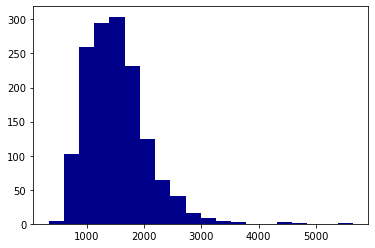

In [80]:
#
plt.hist(houses["GrLivArea"], bins=20, label="A", color=['darkblue']);

## Decisions

- Neighborhood could have some predicitve power, but I'm not yet confident with how to encode that

- OverallQual has a strong correlation with SalePrice, but I'm avoiding because it seems subjective

- Going to model with 'GrLivArea','GarageCars','FullBath'

## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (e.g. GarageQual, GrLivArea, etc...) that you will use to predict our target variable, SalePrice.
Score and plot your predictions. What do these results tell us?

In [177]:
#create LinearRegression object
lr = LinearRegression()

#create feature matrix
feature_cols = ['GrLivArea','GarageCars','FullBath']
X = houses[feature_cols]

In [180]:
#call fit() method and pass in data (features/target)
lr.fit(X, y)

LinearRegression()

In [186]:
#predicted SalePrice using features and add to y_pred
y_pred = lr.predict(X)
y_pred

array([209439.43130232, 176797.61487781, 214976.8823029 , ...,
       215174.96249786, 111750.77712959, 124720.07026254])

In [182]:
#Calculate RMSE
#predictions are off by +/- $48,000
np.sqrt(metrics.mean_squared_error(y, y_pred))

48429.76190221463

In [183]:
#Calculate R-squared
#62.8% of the price is explained by these three features
lr.score(X,y)

0.6281083777956862

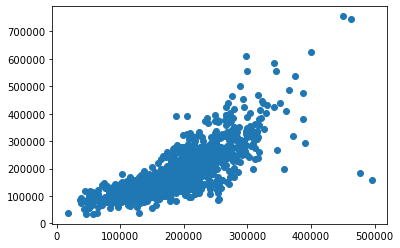

In [204]:
plt.scatter(y_pred, y);

### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [225]:
#70/30 Split

#split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

#create LinearRegression object
lr_7030 = LinearRegression()
#call fit() method and pass in training data
lr_7030.fit(X_train, y_train)

LinearRegression()

In [226]:
#70/30 Split
#feed in test data to make predictions 
y_pred2 = lr_7030.predict(X_test)

In [227]:
#70/30 Split
#calcuate R-Squared
print(f'70/30 | Train | R-Squared: {lr_7030.score(X_train,y_train)}')
print(f'70/30 | Test | R-Squared: {lr_7030.score(X_test,y_test)}')

70/30 | Train | R-Squared: 0.6096312793579741
70/30 | Test | R-Squared: 0.6580668383658597


In [229]:
#70/30 Split RMSE
print(f'70/30 Split | RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred2))}')

70/30 Split | RMSE: 49411.60105868305


Text(0.5, 1.0, '70/30 Split')

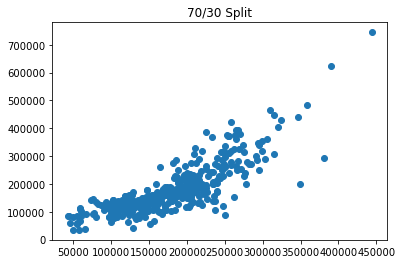

In [230]:
#70/30 Split
plt.scatter(y_pred2, y_test);
plt.title('70/30 Split')

In [231]:
##90/10 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=1)
lr_9010 = LinearRegression()
lr_9010.fit(X_train, y_train)
y_pred3 = lr_9010.predict(X_test)
print('90/10 Split')
print(f'Test | R-Squared: {lr_9010.score(X_test,y_test)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred3))}')

90/10 Split
Test | R-Squared: 0.6389077102079948
RMSE: 52128.02656423809


Text(0.5, 1.0, '90/10')

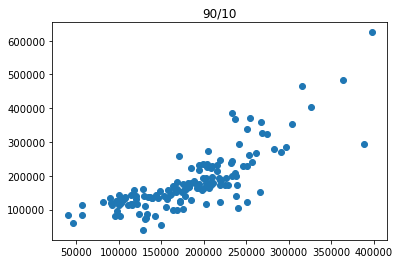

In [232]:
##90/10 Split
plt.scatter(y_pred3, y_test);
plt.title('90/10')

In [153]:
#Dummy Model for comparison
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_test, y_test)

print(np.sqrt(metrics.mean_squared_error(y_test, dummy_regr.predict(X_test))))

84500.3125596292


### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [244]:
#loop from 5-10
for i in range(5,11):
    #create KFold object passing in i splits
    kf = model_selection.KFold(n_splits=i, shuffle=True)
    
    #print out the RMSE & r-squared passing in 70/30 split model and updated kfold object to cross_val_score()
    print(f"{i}-Fold RMSE: {np.mean(-cross_val_score(lr_7030, X, y, cv=kf, scoring='neg_root_mean_squared_error'))}")
    print(f"{i}-Fold R-Squared: {np.mean(cross_val_score(lr_7030, X, y, cv=kf))}")
    print()

5-Fold RMSE: 48857.389601624265
5-Fold R-Squared: 0.6207977653406855

6-Fold RMSE: 48562.98607916574
6-Fold R-Squared: 0.621093465866469

7-Fold RMSE: 48689.65559214944
7-Fold R-Squared: 0.6100368720303881

8-Fold RMSE: 48443.451501593765
8-Fold R-Squared: 0.6010775707566813

9-Fold RMSE: 48704.89366069463
9-Fold R-Squared: 0.6217346590301118

10-Fold RMSE: 48657.85746111058
10-Fold R-Squared: 0.6190658343462474



In [242]:
# very little difference with higher folds

#5-Fold RMSE: 48408.610705107
#5-Fold R-Squared: 0.6253612277176884

#6-Fold RMSE: 48544.348571916744
#6-Fold R-Squared: 0.625293156478802

#7-Fold RMSE: 48398.61187501646
#7-Fold R-Squared: 0.6181512660294483

#8-Fold RMSE: 48505.53206182017
#8-Fold R-Squared: 0.6043559531104532

#9-Fold RMSE: 48708.71969939944
#9-Fold R-Squared: 0.6190222904004068

#10-Fold RMSE: 48391.5294069108
#10-Fold R-Squared: 0.6245914184999035

#### [Home](#home)

<a id="knn"></a>
# <font style='color: green'>2) Optional: KNN Practise</font>

In [ ]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [ ]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [ ]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [ ]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'

# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES

# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES


## KNN Classification of the Iris Dataset

### Create your feature matrix "X"
This will be all species measurements (sepal length, petal width, etc...)

### Create your target vector "y"
This will be the species type.

### Make Use of Train-Test-Split
Split your data in to train and test sets.

### Import KNN From `scikit-learn` and Instantiate a Model With One Neighbor

### Check the Accuracy
Train your model using the training set then use the test set to determine the accuracy

### Create a Model With Five Neighbors. Did it Improve?

### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

### Bonus: According to `scikit-learn` Documentation, What is `knn.predict_proba(X_new)` Going to Do?

#### [Home](#home)

<a id="enrichment"></a>
# <font style='color: green'>3) Optional: Enrichment</font>
_Everything beyond this point is enrichment and examples using Statsmodels for linear regression._

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [ ]:
# First, format our data in a DataFrame

df = pd.read_csv('data/iowa_houses.csv')
df.head()

In [ ]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "SalePrice ~ GrLivArea + OverallQual + LotArea - 1", # - 1 = remove intercept
    "case2": "SalePrice ~ GrLivArea + LotFrontage",
    "case3": "SalePrice ~ LotFrontage + OverallQual"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


### Bonus Challenge #3 /DEMO: Up for an additional challenge? Try again, this time using the `patsy` library

In [ ]:
import patsy

# Add response to the core DataFrame
df['SalePrice'] = y

In [ ]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("SalePrice ~ GrLivArea + OverallQual + LotArea", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [ ]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))